Skriv dit eksamensnummer her: 27

In [56]:
# Importer biblioteker 
import sympy as sp 
import numpy as np
import matplotlib.pyplot as plt

I en model er der to agenter, $1$ og $2$. De har præferencer
med nyttefunktion: 

\begin{equation*}
U_{i}(c_{i},f_{i})=c_{i}-\frac{\eta}{\eta+1}(1-f_{i})^{\frac{\eta+1}{\eta}},
\end{equation*}
hvor $i=1,2,$ $c_{i}$ er type $i$'s forbrug af et forbrugsgode
og $f_{i}$ er forbrug af fritid.  $\eta>0$ er en parameter. 
Der er en industri der producerer
competitivt med produktionsfunktionen: 
\begin{equation*}
y=\left[(A_{1}L_{1})^{\frac{\sigma-1}{\sigma}}+(A_{2}L_{2})^{\frac{\sigma-1}{\sigma}}\right]^{\frac{\sigma}{\sigma-1}},
\end{equation*}
hvor $L_{i}$ er brug af arbejdstid af type $i$. $A_{i}$ er en teknologi parameter for hvor produktive hver af de to typer arbejdere er. Denne produktionsfunktion kaldes en "Constant Elasticity of Substitution" produktionsfunktion. $\sigma>0$ og $\sigma\ne1$


### Opgave 6.1)
- Argumenter for at disse antagelser giver profit lig med nul

### Svar:

For at opnå profit lig nul, skal markedet komme i ligevægt. 

For forbrugerne ser vi, at $\eta>0$, så potensen $\frac{\eta+1}{\eta}$ altid er $>1$. Hvis $\eta$ går mod $\infty$, så går elasticiteten mod 1, dvs. perfekt subtitution mellem fritid og forbrug.

For virksomhederne gælder, at hvis $\sigma$ går mod $\infty$, så går elasticiteten også mod 1. Altså kan producenterne også substituerer arbejdskraft med teknologi. 

Markedet vil under kompetitive forhold finde en ligevægtspris, fordi virksomhederne er i stand til at substituere teknologi for arbejdskraft, hvis forbrugerne vælger at øge deres fritid og sænke deres forbrug. 

### Opgave 6.2)
- Løs forbruger $i$'s problem for givne $\eta$, priser $p$, løn $w_i$ og den profit $\pi_i=0$ analytisk (dvs. find optimalt $c_i$ og $f_i$). Lad forbrugerens samlede tid vaere 1 dvs. arbejdstid plus fritid = 1
- Skriv løsningen ind i nedenstående funktion, der tager $\eta$, priser, løn som input og returnerer optimalt forbrugsvalg og fritid for forbruger $i$

- Skriv den algebraiske løsning her

Forbrugerens problem er 

$
\underset{c_i,f_i}{\text{max}} \hspace{0.5 em} U_i(c_i,f_i) \hspace{0.5 em} \text{u.b.} \hspace{0.5 em} pc_i=w_i(1-f_i)
$

Det giver os Lagrange-ligningen

$
L=c_i-\frac{\eta}{\eta +1}(1-f_i)^{\frac{\eta+1}{\eta}}-\lambda (pc_i-w_i(1-f_i))
$

Problemet løses i pythonkoden nedenfor. Løsningerne er optimalt forbrug 

$
c_i^*=w_i\frac{\left(\frac{p}{w_i}\right)^{-\eta}}{p}
$

og optimal fritid

$
f_i^*=1-\left(\frac{p}{w_i}\right)^{-\eta}
$

In [57]:
# Løsning af forbrugerens problem 
def løsning_forbrugeren(p, w, eta):
    '''Løs forbrugerens problem for forbruger i
    
    Inputs
    ---------
    p:  Pris for forbrugsgode
    w:  Løn for forbruger i
    eta : parameter i nyttefunktionen
    
    Returnerer
    ----------
    c: optimalt forbrug
    f: Optimal fritid
    '''
    
    # Definer variable som symboler 
    c_i, eta_i, f_i, p_i, w_i, lamb, l_i = sp.symbols('c_i, \u03B7, \
        f_i, p, w, \u03BB, l', real=True)
    # Nyttefunktionen
    U =  c_i - eta_i/(eta_i+1) * (1-f_i)**((eta_i+1)/eta_i)
    U = c_i - ( (eta_i*(1-f_i)**((eta_i+1)/eta_i))/(eta_i+1) )
    # Budgetbegrænsningen
    budget = p_i*c_i - w_i*(1-f_i)
    # Lagrangian 
    L = U - lamb * budget 
    # Afledte
    partial_c = L.diff(c_i)
    partial_l = L.diff(f_i)
    partial_lamb = L.diff(lamb)

    # Løsninger 
    eq_list = [partial_c, partial_l, partial_lamb]
    solutions = sp.solve(eq_list, (c_i, f_i, lamb))
    opt_c = solutions[0][0]
    opt_f = solutions[0][1]

    # Numerisk evaluering 
    opt_c_eval = opt_c.subs([(p_i, p), (w_i, w), (eta_i, eta)])
    opt_f_eval = opt_f.subs([(p_i, p), (w_i, w), (eta_i, eta)])

    c = float(opt_c_eval)
    f = float(opt_f_eval)
    
    return c, f

*Hint: Hvis du eksekverer følgende celle, skal den printe ``c = 0.125`` og ``f = 0.5``*

In [58]:
p = 1
w = 0.25
eta = 0.5
c, f = løsning_forbrugeren(p, w, eta)
print(f'c = {np.round(c,3)}')
print(f'f = {np.round(f,3)}')

c = 0.125
f = 0.5


### Opgave 6.3)
- Løs virksomhedens enhedsomkostningsproblem. Dvs. minimer virksomhedens omkostninger for given $w_1$, $w_2$, $A_1$, $A_2$ når den producerer en enhed. Vis at dette giver omkostninger på: 
\begin{equation*}
C(w_{1},w_{2})=(\left(w_{1}/A_{1}\right)^{1-\sigma}+\left(w_{2}/A_{2}\right)^{1-\sigma})^{\frac{1}{1-\sigma}}
\end{equation*}
og brug af arbejdskraft af hver af de to typer af
\begin{equation*}
L_1(w_{1},w_{2})=\frac{w_{1}^{-\sigma}A_{1}^{\sigma-1}}{(\left(w_{1}/A_{1}\right)^{1-\sigma}+\left(w_{2}/A_{2}\right)^{1-\sigma})^{\frac{\sigma}{\sigma-1}}},
\end{equation*}

\begin{equation*}
L_2(w_{1},w_{2})=\frac{w_{2}^{-\sigma}A_{2}^{\sigma-1}}{(\left(w_{1}/A_{1}\right)^{1-\sigma}+\left(w_{2}/A_{2}\right)^{1-\sigma})^{\frac{\sigma}{\sigma-1}}}
\end{equation*}

- Skriv en funktion forneden der tager $A_1$, $A_2$, $w_1$, $w_2$ og $y$ og $\sigma$ for given og giver ENHEDSomkostninger samt TOTAL efterspoergsel efter $L_1$ og $L_2$

- Løs det algebraiske problem her (Du kan godt løse resten af problemet uden at løse det algebraiske problem korrekt)

### Svar:

Man kan udlede de optimale input $L_1$ og $L_2$ ved at løse problemet

$w_1L_1+w_2L_2 \hspace{.7 em} \text{u.b.} \hspace{.7em} y(L_1,L_2)$

Det giver Lagrange-ligning

$ L = w_1L_1+w_2L_2 + \lambda y - \lambda [ (A_1L_1)^{(\sigma-1/\sigma)} + (A_2L_2)^{(\sigma-1/\sigma)} ]^{(\sigma/(\sigma-1))} $

In [59]:
# Løsning af virksomhedens problem.

def løsning_virksomheden(A_1, A_2,w_1,w_2,y,sigma):
    '''Løs virksomhedens problem for virksomhed i
    
    Parametre
    ---------
    A_i: produktivitet for agent i
    w_i: løn for agent i
    y  : Total produktion
    sigma: parameter
    
    Returnerer
    ----------
    cost:  Enhedsomkostning
    L_1 :  Efterspørgsel efter type 1
    L_2 :  Efterspørgsel efter type 2
    '''
    # Parametre 
    w1, w2, A1, A2, s, Y = sp.symbols('w_1, w_2, A_1, A_2, \u03c3, y')

    # Minima 
    min_cost = ( (w1/A1)**(1-s) + (w2/A2)**(1-s) )**(1/(1-s) )

    min_L_1 = (w_1**(-s)*A_1**(s-1))\
        /(((w1/A1)**(1-s) + (w2/A2)**(1-s))**(s/(s-1)))
    
    min_L_2 = (w2**(-s)*A2**(s-1))\
        /(((w1/A1)**(1-s) + (w2/A2)**(1-s))**(s/(s-1)))

    # Enheds minima 
    enheds_min_L_1 = min_L_1 * Y 
    enheds_min_L_2 = min_L_2 * Y 

    # Numerisk evaluering 
    subs_list = [(A1, A_1),(A2, A_2), (w1, w_1), (w2, w_2), (s, sigma), (Y, y)]
    length = len(subs_list)
    
    cost = float(min_cost.subs(subs_list))
    L_1 = float(enheds_min_L_1.subs(subs_list))
    L_2 = float(enheds_min_L_2.subs(subs_list))
    
    return cost, L_1, L_2

*Hint: Hvis du eksekverer følgende celle, skal den printe 
c_1 = 0.5
L_1 = 0.25
L_2 = 0.166

In [60]:
A_1 = 2
A_2 = 3
w_1 = 2
w_2 = 3
y   = 2 
sigma = 2

c_1, L_1, L_2 = løsning_virksomheden(A_1, A_2,w_1,w_2,y,sigma)

print(f'c_1 = {c_1}')
print(f'L_1 = {L_1}')
print(f'L_2 = {L_2}')

c_1 = 0.5
L_1 = 0.25
L_2 = 0.16666666666666666


### Opgave 6.4)
- Lav en figur for isokvanten af produktionsfunktionen. Gør dette for $A_1=A_2=1$ og $\sigma = 0.01$ og produktion på 1. Lav en tilsvarende figur for $\sigma = 20$. Kommenter paa forskellen mellem de to dog. Fortolk.


### Svar: 

Isokvanterne tydeliggør, hvor hvilke kombinationer af de to typer arbejdskraft som input, der giver samme produktionsoutput. 

Vi observerer, at med en meget $\sigma = 0.01$, er der næsten ingen mulighed for substitution. De to typer arbejdskraft komplementerer hinanden perfekt, og virksomheden kan højst producere ud fra det laveste output.

I plot 2 med en høj $\sigma=20$, har vi perfekte substitutter. En arbejder af den ene type kan erstatte 1 arbejder af den anden, uden at produktionsniveauet ændres.

En høj sigma giver altså en høj substitutionselasticitet for virksomheden.

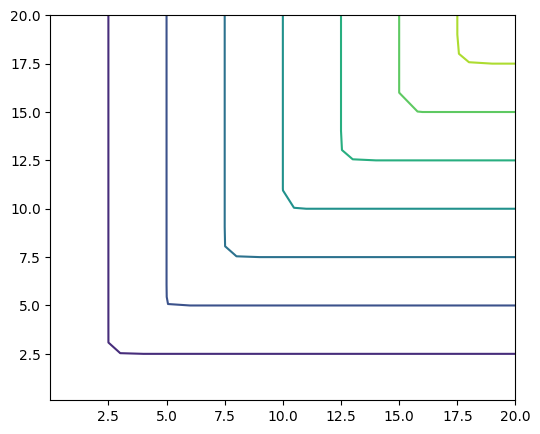

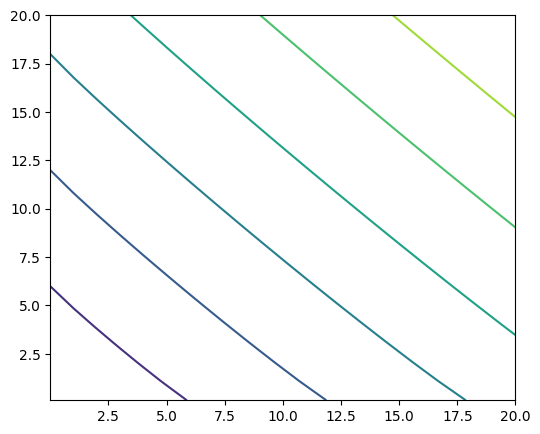

In [61]:
# Isokvant 

# Parametre 
A1, A2, sigma, sigma2, y = 1, 1, 0.01, 20, 1

# Funktion til isokvanter
def isokvant(A1, A2, s, prd, L1, L2):
    # Parametre og produktionsfunktionen 
    prod = ( (A1*L1)**((s-1)/s) + (A2*L2)**((s-1)/s) )**(s/(s-1))
    return prod

# isokvant(A1, A2, sigma, y, 1)
isokvant(A1, A2, sigma2, y, 1, 1)

def iso_plot(A1, A2, sigma, y):
    
    fig, ax = plt.subplots(figsize=(6,5))
    L1 = np.linspace(0.01, 20, 21)
    L2 = np.linspace(0.1, 20, 21)
    l1, l2 = np.meshgrid(L1, L2)
    z = isokvant(A1, A2, sigma, y, l1, l2)
    ax.contour(l1, l2, z)

    plt.show()

iso_plot(A1, A2, sigma, y)
iso_plot(A1, A2, sigma2, y)


### Opgave 6.5)
- Beskriv hvad funktionen i det følgende gør

*Bemærk: Opgaven forsætter under cellen*

### Svar: 

Funktionen udregner tre residualer på grundlag af en række faste parametre som teknologi, løn og substitutionselasticitet i modellen.

De to første residualer er forskellen mellem virksomhedens optimale efterspørgsel efter arbejdskraft og forbrugernes optimale arbejdstid. Residual 1 er altså forskellen mellem virksomhedens efterspørgsel efter forbruger 1's arbejde og forbruger 1's ønskede arbejdstid.

De tredje residual er forskellen mellem prisen på godet og de minimerede enhedsomkostninger.

Til sammen afgør funktionen altså i hvor høj grad teknologi og elasticitet mellem arbejdskraft og teknologi, som er til rådighed, samt lønniveauet, får økonomien til at afvige fra forbrugerens optimale forbrug og virksomhedens optimale produktion.  

Funktionen returnerer endeligt en kvadreret sum af residualerne. Da residualerne repræsenterer afvigelser fra det optimale, sikrer denne udregning at både positive og negative afvigelser tælles med.

In [62]:
def residualer_markedsclearing(params, p, A_1, A_2, eta, sigma):
# def residualer_markedsclearing(y, w_1, w_2, p, A_1, A_2, eta, sigma):
    y, w_1, w_2 = params

    '''
    Parametre 
    ---------
    p  : skalar: pris på forbrugsgodet
    w1 : løn til agent af type 1
    w2 : løn til agent af type 2
    y  : produktionen i økonomien
    A1 : Teknologi for type 1
    A2 : Teknologi for type 2
    eta: parameter for nytten
    sigma: parameter fra produktionsfunktionen
    
    Returnerer 
    ---------
    res_tot
    
    
    '''
    cost, L_1, L_2 = løsning_virksomheden(A_1, A_2,w_1,w_2,y,sigma)
    
    c_1 , f_1 = løsning_forbrugeren(p, w_1, eta)
    c_2 , f_2 = løsning_forbrugeren(p, w_2, eta)
    
    residual1 = L_1 - (1-f_1)
    residual2 = L_2 - (1-f_2)
    residual3 = p-cost
    
    res_tot = residual1**2+residual2**2+residual3**2
    
    return res_tot

### Opgave 6.6)
- Sæt prisen på varen som numeraire, altså $p=1$. Skriv en funktion der finder den kombination af $(y,w_1,w_2)$ der minimerer residualer_markedsclearing for given $A_1$, $A_2$ $\sigma$ og $\eta$. Du kan enten goere det ved en gridsearch eller ved "minimize". Husk da  "from scipy.optimize import minimize". Husk at gridsearch er muligt men langsomt

In [63]:
from scipy.optimize import minimize 

def minimum_residual(A1, A2, eta, sigma):
    # Numeraire 
    p = 1
    # Gæt for  variablene y, w1, w2
    guess = [1, 1, 1]
    constants = [p, A1, A2, sigma, eta]

    minimum = minimize(residualer_markedsclearing, guess, args=(*constants,))

    return minimum 

# Eksempel med A1 = 1, A2 = 1, eta = 2 og sigma = 0.3.
# minimum_residual(1, 1, 2, 0.3)